In [362]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

In [363]:
# Load the dataset
data = pd.read_csv('indeed.csv')

In [364]:
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Apply the scaler to the 'New Salary' column
# data['New Salary'] = scaler.fit_transform(data['New Salary'].values.reshape(-1, 1))

# # Print the normalized data
# print(data)

In [365]:
# seperate features and label
X = data[["New Salary","Experience"]]
y = data["Job_Pos"]

In [366]:
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [367]:
# for bernoulli
a_train = X_train
a_test = X_test
b_train = y_train.astype(int)
b_test = y_test.astype(int)

In [368]:
class_prob = [0.25,0.25,0.25,0.25]

# **MultinomialNB**

In [369]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Define the hyperparameters to tune and their possible values
param_grid = {'alpha': [0.1, 1.0, 10.0],
              'fit_prior': [True, False]}

# Perform hyperparameter tuning using GridSearchCV
M_clf = MultinomialNB()
grid_search = GridSearchCV(M_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train the MNB classifier on the training data using the best hyperparameters
M_clf = MultinomialNB(alpha=best_params['alpha'], fit_prior=best_params['fit_prior'], class_prior=class_prob)
M_clf.fit(X_train, y_train)


MultinomialNB(alpha=10.0, class_prior=[0.25, 0.25, 0.25, 0.25], fit_prior=False)

In [370]:
M_accuracy = M_clf.score(X_test, y_test)
print(f'Accuracy: {M_accuracy}')

Accuracy: 0.38372093023255816


In [371]:
y_test_pred = M_clf.predict(X_test)
pred_prob = M_clf.predict_proba(X_test)
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           1       0.51      0.83      0.63        23
           2       0.50      0.05      0.09        21
           3       0.31      0.65      0.42        20
           4       0.00      0.00      0.00        22

    accuracy                           0.38        86
   macro avg       0.33      0.38      0.28        86
weighted avg       0.33      0.38      0.29        86



In [372]:
M_cm = confusion_matrix(y_test, y_test_pred)
print(M_cm)

[[19  0  4  0]
 [ 8  1  7  5]
 [ 7  0 13  0]
 [ 3  1 18  0]]


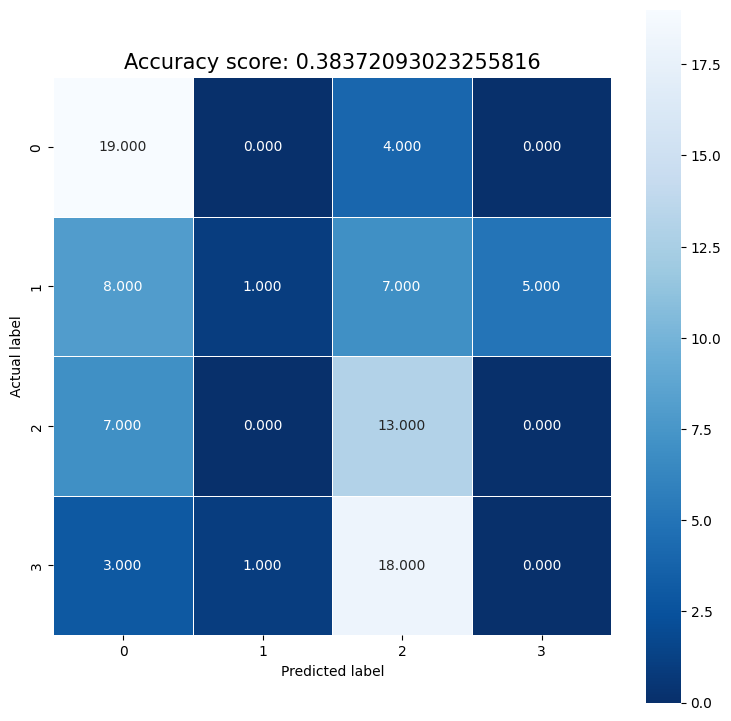

In [373]:
plt.figure(figsize=(9,9))
sns.heatmap(M_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Accuracy score: {0}'.format(M_accuracy)
plt.title(all_sample_title, size=15);

# **GaussianNB**

In [374]:
from sklearn.naive_bayes import GaussianNB

In [375]:
G_clf = GaussianNB()
G_clf.fit(X_train, y_train)

GaussianNB()

In [376]:
G_accuracy = G_clf.score(X_test, y_test)
print(f'Accuracy: {G_accuracy}')

Accuracy: 0.7790697674418605


In [377]:
y_test_pred = G_clf.predict(X_test)
pred_prob = G_clf.predict_proba(X_test)
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        23
           2       0.75      0.71      0.73        21
           3       0.56      0.75      0.64        20
           4       0.89      0.73      0.80        22

    accuracy                           0.78        86
   macro avg       0.80      0.78      0.78        86
weighted avg       0.81      0.78      0.79        86



In [378]:
print(y_test_pred)

[1 4 3 3 2 4 4 3 1 4 1 3 3 3 1 3 4 2 3 1 2 1 1 4 1 3 2 3 4 2 4 2 2 1 2 3 2
 2 3 3 1 1 1 3 2 4 4 4 2 2 4 3 3 1 3 4 4 4 1 2 3 2 3 1 4 2 1 1 2 1 1 2 4 1
 3 3 3 2 3 3 1 2 3 3 3 4]


In [379]:
G_cm = confusion_matrix(y_test, y_test_pred)
print(G_cm)

[[21  2  0  0]
 [ 0 15  6  0]
 [ 0  3 15  2]
 [ 0  0  6 16]]


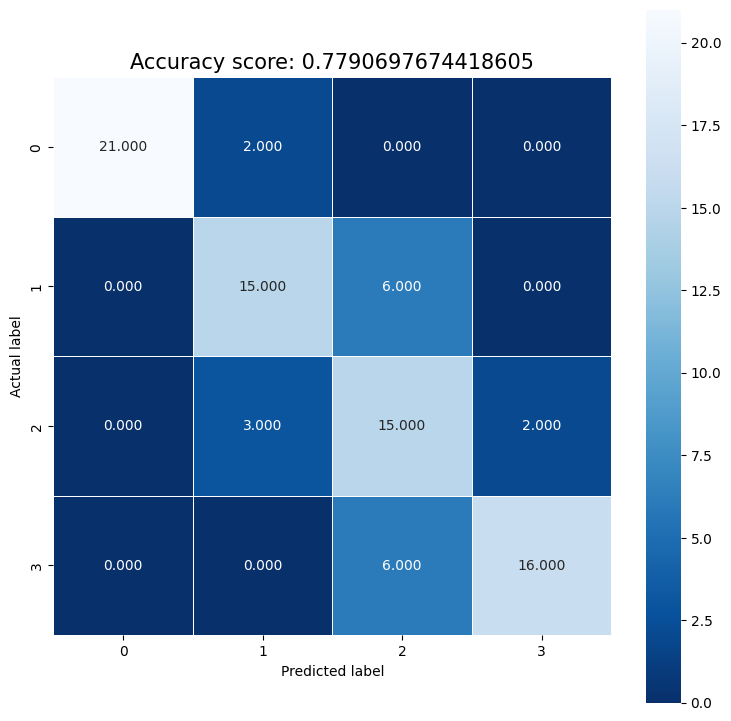

In [380]:
plt.figure(figsize=(9,9))
sns.heatmap(G_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Accuracy score: {0}'.format(G_accuracy)
plt.title(all_sample_title, size=15);

# **BernoulliNB**

In [381]:
from sklearn.naive_bayes import BernoulliNB

In [382]:
B_clf = BernoulliNB(alpha=0.1, fit_prior=True, binarize=0.5)
B_clf.fit(a_train, b_train)

BernoulliNB(alpha=0.1, binarize=0.5)

In [383]:
B_accuracy = B_clf.score(X_test, y_test)
print(f'Accuracy: {B_accuracy}')

Accuracy: 0.23255813953488372


In [384]:
y_test_pred = B_clf.predict(X_test)
pred_prob = B_clf.predict_proba(X_test)
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        21
           3       0.23      1.00      0.38        20
           4       0.00      0.00      0.00        22

    accuracy                           0.23        86
   macro avg       0.06      0.25      0.09        86
weighted avg       0.05      0.23      0.09        86



c:\Users\Ayooo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ayooo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ayooo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [385]:
B_cm = confusion_matrix(y_test, y_test_pred)
print(B_cm)

[[ 0  0 23  0]
 [ 0  0 21  0]
 [ 0  0 20  0]
 [ 0  0 22  0]]


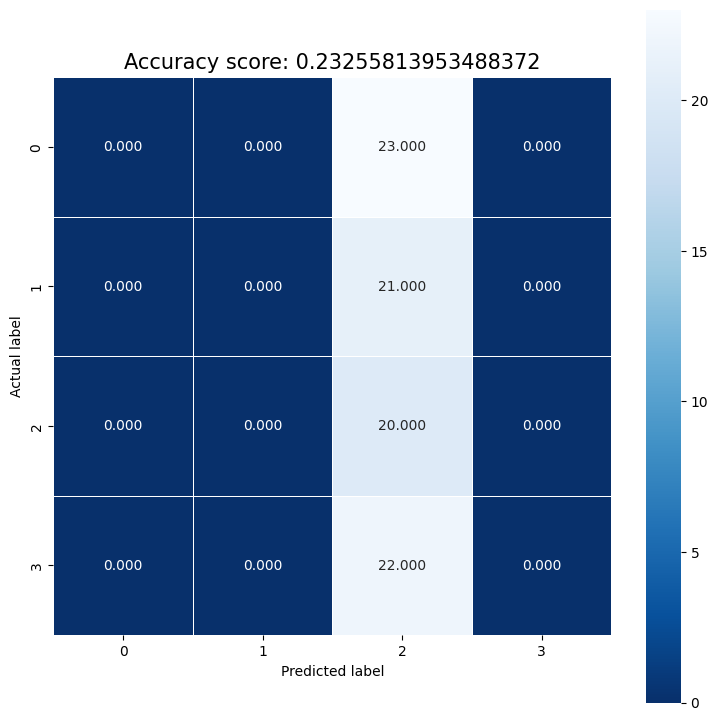

In [386]:
plt.figure(figsize=(9,9))
sns.heatmap(B_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Accuracy score: {0}'.format(B_accuracy)
plt.title(all_sample_title, size=15);

In [387]:
import pickle

In [388]:
with open('nbB_model.pkl', 'wb') as f:
    pickle.dump(B_clf, f)
nbB_model_dump = pickle.load(open('nbB_model.pkl', 'rb'))

with open('nbG_model.pkl', 'wb') as g:
    pickle.dump(G_clf, g)
nbG_model_dump = pickle.load(open('nbG_model.pkl', 'rb'))

with open('nbM_model.pkl', 'wb') as h:
    pickle.dump(M_clf, h)
nbM_model_dump = pickle.load(open('nbM_model.pkl', 'rb'))


In [392]:
salary = 120000
exp = 4
sample = np.array([salary,exp])
print(G_clf.predict(sample.reshape(1, -1)))
print(M_clf.predict(sample.reshape(1, -1)))
print(B_clf.predict(sample.reshape(1, -1)))

[3]
[1]
[3]


c:\Users\Ayooo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\Ayooo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\Ayooo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [393]:
print("Gaussian: ", G_accuracy) 
print("Multinomial: ", M_accuracy)
print("Bernoulli:", B_accuracy)

Gaussian:  0.7790697674418605
Multinomial:  0.38372093023255816
Bernoulli: 0.23255813953488372
